In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
def compute_cost(Y, Y_pred):
    m,n = Y.shape
    return 1/(2*n) * np.sum(np.square(Y-Y_pred))
def compute_r2(Y, Y_pred):
    ss_res = np.sum(np.square(Y-Y_pred))
    ss_tot = np.sum(np.square(Y - np.mean(Y)))
    return 1 - (ss_res/ss_tot)


# Linear Regression

In [3]:
def linear_regression_nn(X,Y, learning_rate, numiter):
    m,n = X.shape
    
    W = np.random.randn(1,m)
    b = 0
    cost = []
    accuracy = []
    
    for i in range(numiter):
        A = np.dot(W,X) + b
        
        costs = compute_cost(Y,A)
        cost.append(costs)
        
        error = A - Y
        dW = (1/n) * np.dot(error,X.T)
        db = (1/n) * np.sum(error)

        W -= learning_rate*dW
        b -= learning_rate*db
        r2 = compute_r2(Y,A)
        accuracy.append(r2)
        if (i%100 == 0):
            print("iter: %d, cost: %f,r2: %f" %(i, costs,r2))
    return W,b,cost, accuracy

In [4]:
data = pd.read_csv("C:\\Users\\Asus\\Documents\\kc_house_data.csv")
data = data.drop(["id","date"], axis= 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data["age"] = 2023 - data["yr_built"]
data = data.drop("yr_built", axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,68
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,72
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,36


In [6]:
for i in range(21597):
    if(data["yr_renovated"][i] > 0):
        data["yr_renovated"][i] = 1

C:\Users\Asus\AppData\Local\Temp\ipykernel_17236\2144175036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yr_renovated"][i] = 1
C:\Users\Asus\AppData\Local\Temp\ipykernel_17236\2144175036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yr_renovated"][i] = 1
C:\Users\Asus\AppData\Local\Temp\ipykernel_17236\2144175036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yr_renovated"][i] = 1
C:\Users\Asus\AppDa

In [7]:
Y = data["price"].values
Y = np.log(Y)
X1 = data.drop("price", axis= 1)
X1 = X1.values
print(X1)
print(Y)

[[3.000e+00 1.000e+00 1.180e+03 ... 1.340e+03 5.650e+03 6.800e+01]
 [3.000e+00 2.250e+00 2.570e+03 ... 1.690e+03 7.639e+03 7.200e+01]
 [2.000e+00 1.000e+00 7.700e+02 ... 2.720e+03 8.062e+03 9.000e+01]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 1.020e+03 2.007e+03 1.400e+01]
 [3.000e+00 2.500e+00 1.600e+03 ... 1.410e+03 1.287e+03 1.900e+01]
 [2.000e+00 7.500e-01 1.020e+03 ... 1.020e+03 1.357e+03 1.500e+01]]
[12.30998211 13.19561384 12.10071213 ... 12.90445858 12.89921983
 12.69158046]


In [8]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.3, random_state= 0)
X_train_T = X_train.T
X_test_T = X_test.T
Y_train_T = Y_train.reshape(1, Y_train.shape[0])
y_test_T= Y_test.reshape(1,Y_test.shape[0])


In [9]:
W,b,cost, accuracy = linear_regression_nn(X_train_T, Y_train_T, 0.01,2500)

iter: 0, cost: 102.945377,r2: -739.519843
iter: 100, cost: 12.882731,r2: -91.669705
iter: 200, cost: 2.042312,r2: -13.691022
iter: 300, cost: 0.439531,r2: -2.161687
iter: 400, cost: 0.155960,r2: -0.121871
iter: 500, cost: 0.086477,r2: 0.377944
iter: 600, cost: 0.061391,r2: 0.558396
iter: 700, cost: 0.049448,r2: 0.644305
iter: 800, cost: 0.042869,r2: 0.691628
iter: 900, cost: 0.038962,r2: 0.719734
iter: 1000, cost: 0.036539,r2: 0.737161
iter: 1100, cost: 0.034996,r2: 0.748261
iter: 1200, cost: 0.033995,r2: 0.755460
iter: 1300, cost: 0.033338,r2: 0.760186
iter: 1400, cost: 0.032903,r2: 0.763317
iter: 1500, cost: 0.032613,r2: 0.765405
iter: 1600, cost: 0.032418,r2: 0.766805
iter: 1700, cost: 0.032287,r2: 0.767747
iter: 1800, cost: 0.032199,r2: 0.768383
iter: 1900, cost: 0.032139,r2: 0.768814
iter: 2000, cost: 0.032098,r2: 0.769106
iter: 2100, cost: 0.032071,r2: 0.769305
iter: 2200, cost: 0.032052,r2: 0.769440
iter: 2300, cost: 0.032039,r2: 0.769532
iter: 2400, cost: 0.032030,r2: 0.769595


In [10]:
print(W)

[[-0.01012183  0.04741318  1.37103867  0.01697718  0.04006188  0.03111049
   0.04729849  0.04260955  0.18164585 -1.11956362 -0.59211394  0.01473386
  -0.0354613   0.19708166 -0.02305446  0.06960182 -0.00726324  0.09563627]]


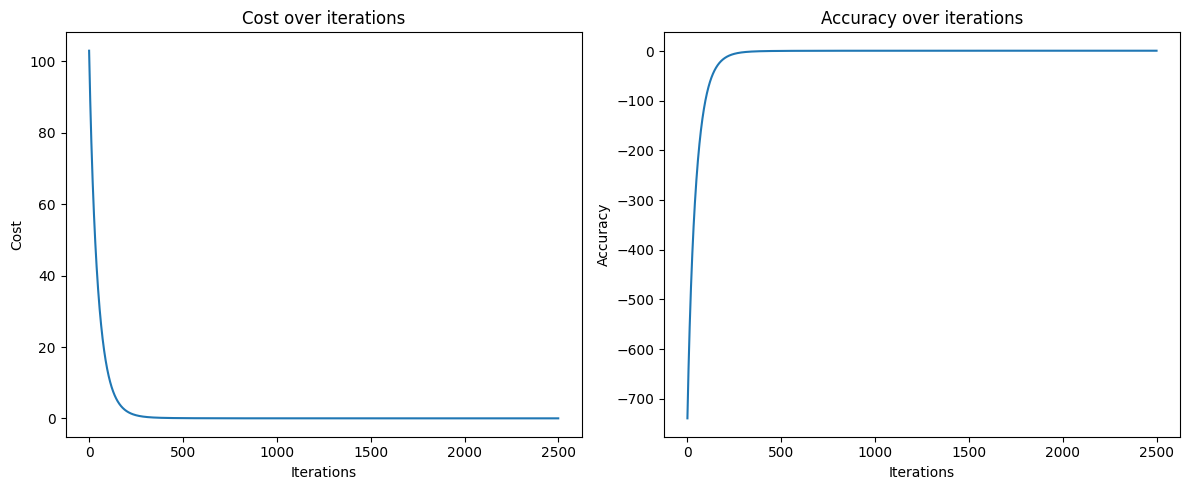

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cost)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [12]:
Y_pred = np.dot(W,X_test_T) + b
print(compute_cost(y_test_T, Y_pred))
print(compute_r2(y_test_T,Y_pred))

0.031392900479204906
0.7719266876521126


# Ridge Regression

In [13]:
X1 = data.drop("price", axis= 1)
X1 = X1.values
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
# X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.2, random_state= 0)
# X_train_T = X_train.T
# X_test_T = X_test.T
# Y_train_T = Y_train.reshape(1, Y_train.shape[0])
# y_test_T= Y_test.reshape(1,Y_test.shape[0])

In [15]:
t = np.ones((X1.shape[0],1))
X1_bar = np.concatenate((t, X1),axis =1)

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X1_bar,Y, test_size=0.2, random_state= 0)
X_train_T = X_train.T
X_test_T = X_test.T
Y_train_T = Y_train.reshape(1, Y_train.shape[0])
y_test_T= Y_test.reshape(1,Y_test.shape[0])

In [17]:
np.dot(X_train_T,X_train).shape

(19, 19)

In [18]:
def ridge_loss(Y, Y_pred, W, alpha):
    m,n = Y.shape
    return (1/(2*n) * np.sum(np.square(Y-Y_pred)) + 1/2 * alpha * (np.sum(W**2)))

In [19]:
def linear_reg_ridge_nn(X,Y,learning_rate,alpha, numiter):
    m,n = X.shape
    I = np.eye(n)
    W = np.array([np.dot(np.linalg.inv(np.dot(X.T,X)+n*alpha*I),np.dot(X.T,Y))])

    return W

In [20]:
for alpha in np.linspace(0,2, 10):
    print("alpha = %f" %(alpha))
    W = linear_reg_ridge_nn(X_train,Y_train,0.1,alpha,1000)
    # Y_pred = np.dot(W,X_train_T)
    # print(compute_cost(Y_train_T,Y_pred))
    # print(compute_r2(Y_train_T, Y_pred))
    Y_pred = np.dot(W,X_test_T)
    print(ridge_loss(y_test_T,Y_pred,W,alpha))
    print(compute_r2(y_test_T, Y_pred))

alpha = 0.000000
0.03314061232417366
0.7535116226499987
alpha = 0.222222
18.951956036137968
0.7701269684320132
alpha = 0.444444
37.854524936684655
0.7700581310196889
alpha = 0.666667
56.73863462859746
0.7699136916936519
alpha = 0.888889
75.60430542542392
0.7696937616268904
alpha = 1.111111
94.45155761404033
0.7693984518273087
alpha = 1.333333
113.2804114546937
0.7690278731379964
alpha = 1.555556
132.09088718104496
0.7685821362374922
alpha = 1.777778
150.88300500021015
0.7680613516400974
alpha = 2.000000
169.65678509280343
0.7674656296961442


# Lasso 

In [21]:
def lasso_loss(X,Y, W, alpha):
    m,n = Y.shape
    y_pred = np.dot(W, X)
    error = y_pred - Y
    mse = 1/(2*n) * np.sum(np.square(error))
    l1_norm = alpha * np.sum(np.abs(W))
    loss = mse +l1_norm
    return loss


In [22]:
def lasso_gradient(X,Y, W, alpha):
    m,n = Y.shape
    y_pred = np.dot(W,X)
    error = y_pred - Y
    gradient = np.dot(error,X.T) / n
    l1_gradient = alpha * np.sign(W)
    l1_gradient[0] = 0
    total = gradient +l1_gradient
    return total


In [23]:
def lasso_regression(X,y, alpha, learning_rate, numiter):
    m,n = X.shape
    W = np.random.randn(1,m)
    loss = []
    accuracy = []
    for i in range(numiter):
        losss = lasso_loss(X,y, W, alpha)
        y_pred = np.dot(W,X)
        accu = compute_r2(y, y_pred)
        loss.append(losss)
        accuracy.append(accu)
        gradient = lasso_gradient(X,y, W, alpha)
        W = W - learning_rate*gradient
        if (i%100 == 0):
            print("iter: %d, loss: %f, accuracy: %f" %(i,losss,accu))
    return W,loss,accuracy

In [24]:
W, loss, accuracy = lasso_regression(X_train_T,Y_train_T, 0.1, 0.01, 3500)


iter: 0, loss: 110.358435, accuracy: -780.584120
iter: 100, loss: 15.907070, accuracy: -103.066047
iter: 200, loss: 3.535928, accuracy: -13.522224
iter: 300, loss: 1.862196, accuracy: -1.291045
iter: 400, loss: 1.632953, accuracy: 0.430689


iter: 500, loss: 1.598935, accuracy: 0.691825
iter: 600, loss: 1.592470, accuracy: 0.740295
iter: 700, loss: 1.588490, accuracy: 0.753943
iter: 800, loss: 1.584860, accuracy: 0.760054
iter: 900, loss: 1.582082, accuracy: 0.763605
iter: 1000, loss: 1.579771, accuracy: 0.765881
iter: 1100, loss: 1.577902, accuracy: 0.767388
iter: 1200, loss: 1.576409, accuracy: 0.768400
iter: 1300, loss: 1.575221, accuracy: 0.769083
iter: 1400, loss: 1.574276, accuracy: 0.769546
iter: 1500, loss: 1.573524, accuracy: 0.769860
iter: 1600, loss: 1.572923, accuracy: 0.770073
iter: 1700, loss: 1.572443, accuracy: 0.770218
iter: 1800, loss: 1.572057, accuracy: 0.770317
iter: 1900, loss: 1.571748, accuracy: 0.770385
iter: 2000, loss: 1.571498, accuracy: 0.770431
iter: 2100, loss: 1.571297, accuracy: 0.770462
iter: 2200, loss: 1.571134, accuracy: 0.770484
iter: 2300, loss: 1.571002, accuracy: 0.770498
iter: 2400, loss: 1.570895, accuracy: 0.770508
iter: 2500, loss: 1.570808, accuracy: 0.770515
iter: 2600, loss: 

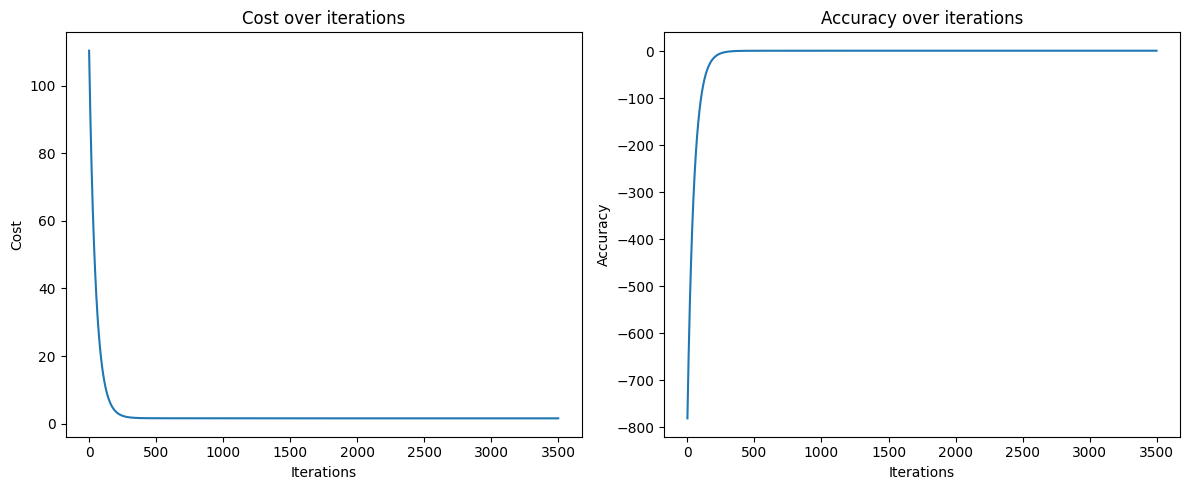

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [25]:
print(W)

[[ 1.30485484e+01 -9.30083942e-03  5.32276209e-02 -5.41736505e-01
   1.71732288e-02  4.05607299e-02  3.10548610e-02  4.70243243e-02
   4.09756859e-02  1.88856978e-01  5.99240647e-01  3.27479302e-01
   1.32392678e-02 -3.49655262e-02  1.95394290e-01 -2.09455233e-02
   6.68034499e-02 -6.94166469e-03  1.00774411e-01]]


# SGD
